In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/processed/final-data.csv")

In [3]:
df

,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,...,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,TransactionId_numeric,BatchId_numeric,AccountId_numeric,SubscriptionId_numeric,CustomerId_numeric
0,-0.046371,-0.072291,2018-11-15 02:18:49+00:00,2,0,0.170118,-0.067623,-0.311831,-0.167922,2,...,0,0,0,1,0,76871.0,36123.0,3957.0,887.0,4406.0
1,-0.054643,-0.080251,2018-11-15 02:19:08+00:00,2,0,0.170118,-0.067623,-0.311831,-0.167922,2,...,0,0,1,0,0,73770.0,15642.0,4841.0,3829.0,4406.0
2,-0.050426,-0.076352,2018-11-15 02:44:21+00:00,2,0,0.165122,-0.072568,-0.444993,-0.201992,2,...,0,0,0,1,0,26203.0,53941.0,4229.0,222.0,4683.0
3,0.107717,0.096648,2018-11-15 03:32:55+00:00,2,0,0.175567,-0.008155,-0.404020,-0.009717,3,...,1,0,0,1,0,380.0,102363.0,648.0,2185.0,988.0
4,-0.059704,-0.075183,2018-11-15 03:34:21+00:00,2,0,0.175567,-0.008155,-0.404020,-0.009717,3,...,0,0,1,0,0,28195.0,38780.0,4841.0,3829.0,988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,-0.062591,-0.072291,2019-02-13 09:54:09+00:00,2,0,0.276904,-0.028743,0.204885,0.050586,9,...,0,0,1,0,0,89881.0,96668.0,4841.0,3829.0,3078.0
95658,-0.046371,-0.072291,2019-02-13 09:54:25+00:00,2,0,0.167759,-0.062526,-0.398330,-0.176518,9,...,0,0,0,1,0,91597.0,3503.0,3439.0,2643.0,3874.0
95659,-0.054643,-0.080251,2019-02-13 09:54:35+00:00,2,0,0.167759,-0.062526,-0.398330,-0.176518,9,...,0,0,1,0,0,82501.0,118602.0,4841.0,3829.0,3874.0
95660,-0.030151,-0.056047,2019-02-13 10:01:10+00:00,2,0,0.204153,-0.059427,0.149116,-0.166068,10,...,0,0,0,1,0,136354.0,70924.0,1346.0,652.0,1709.0


In [4]:
df = df.drop("TransactionStartTime", axis=1)

In [5]:
# Derive a new variable based on the sign of the Amount (1 for Debit, 0 for Credit)

df['Transaction_Type'] = df['Amount'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows to verify
df[['Amount', 'Transaction_Type']]

,Amount,Transaction_Type
0,-0.046371,0
1,-0.054643,0
2,-0.050426,0
3,0.107717,1
4,-0.059704,0
...,...,...
95657,-0.062591,0
95658,-0.046371,0
95659,-0.054643,0
95660,-0.030151,0


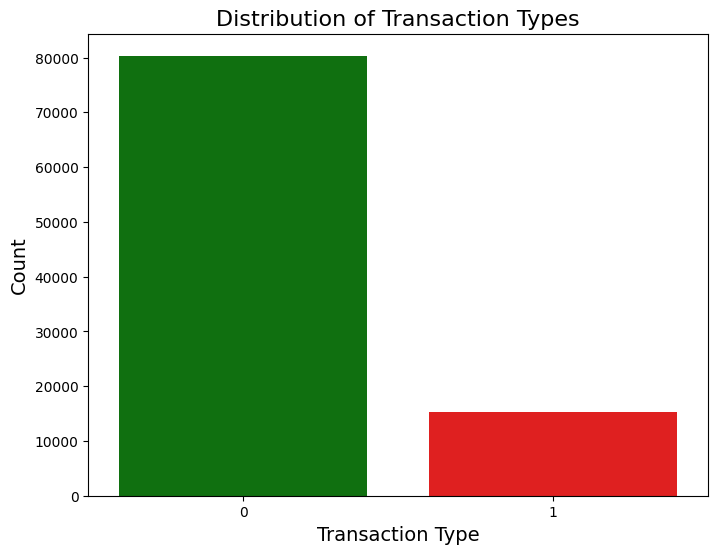

In [6]:
# Count the occurrences of each Transaction_Type
transaction_counts = df['Transaction_Type'].value_counts()

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette=['green', 'red'])

# Add labels and title
plt.title('Distribution of Transaction Types', fontsize=16)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

In [7]:
df

,Amount,Value,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,...,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,TransactionId_numeric,BatchId_numeric,AccountId_numeric,SubscriptionId_numeric,CustomerId_numeric,Transaction_Type
0,-0.046371,-0.072291,2,0,0.170118,-0.067623,-0.311831,-0.167922,2,15,...,0,0,1,0,76871.0,36123.0,3957.0,887.0,4406.0,0
1,-0.054643,-0.080251,2,0,0.170118,-0.067623,-0.311831,-0.167922,2,15,...,0,1,0,0,73770.0,15642.0,4841.0,3829.0,4406.0,0
2,-0.050426,-0.076352,2,0,0.165122,-0.072568,-0.444993,-0.201992,2,15,...,0,0,1,0,26203.0,53941.0,4229.0,222.0,4683.0,0
3,0.107717,0.096648,2,0,0.175567,-0.008155,-0.404020,-0.009717,3,15,...,0,0,1,0,380.0,102363.0,648.0,2185.0,988.0,1
4,-0.059704,-0.075183,2,0,0.175567,-0.008155,-0.404020,-0.009717,3,15,...,0,1,0,0,28195.0,38780.0,4841.0,3829.0,988.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,-0.062591,-0.072291,2,0,0.276904,-0.028743,0.204885,0.050586,9,13,...,0,1,0,0,89881.0,96668.0,4841.0,3829.0,3078.0,0
95658,-0.046371,-0.072291,2,0,0.167759,-0.062526,-0.398330,-0.176518,9,13,...,0,0,1,0,91597.0,3503.0,3439.0,2643.0,3874.0,0
95659,-0.054643,-0.080251,2,0,0.167759,-0.062526,-0.398330,-0.176518,9,13,...,0,1,0,0,82501.0,118602.0,4841.0,3829.0,3874.0,0
95660,-0.030151,-0.056047,2,0,0.204153,-0.059427,0.149116,-0.166068,10,13,...,0,0,1,0,136354.0,70924.0,1346.0,652.0,1709.0,0


In [8]:
# Replace NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

In [9]:
df.columns

Index(['Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AvgTransactionAmount', 'TransactionCount',
       'StdTransactionAmount', 'TransactionHour', 'TransactionDay',
       'TransactionMonth', 'TransactionYear', 'CurrencyCode_UGX',
       'CountryCode_256', 'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',


In [10]:
# Separate features and target variable
target_column = "Transaction_Type"

# Correctly access the DataFrame to create X (features)
X = df[['Amount', 'Value', 'PricingStrategy', 'TotalTransactionAmount', 'AvgTransactionAmount', 
         'TransactionCount', 'StdTransactionAmount', 'TransactionHour', 'TransactionDay', 
         'TransactionMonth', 'TransactionYear', 'CurrencyCode_UGX', 'CountryCode_256',  
         'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services',
         'ProductCategory_movies', 'ProductCategory_utility_bill', 
         'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'FraudResult',
         'ChannelId_ChannelId_5']]  # Features

# Target variable
y = df[target_column]  # Target variable

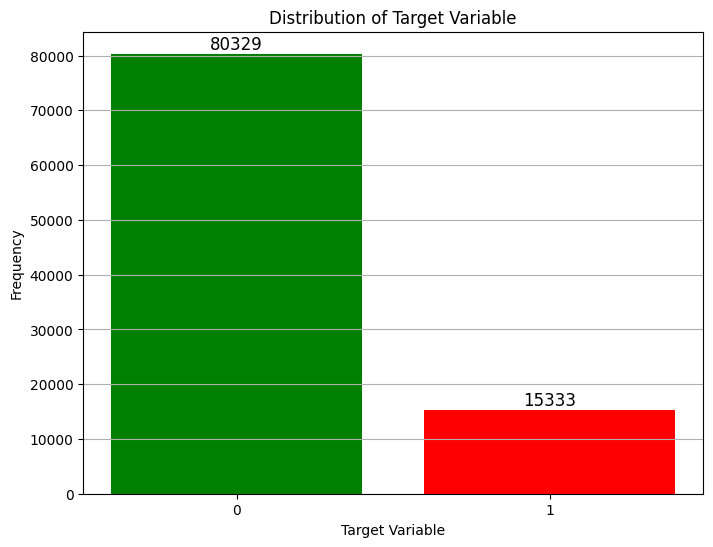

In [11]:
# Count value occurrences in the target column
value_counts = df['Transaction_Type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color=['green', 'red'])

# Adding counts on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(value_counts.index)
plt.show()

In [12]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

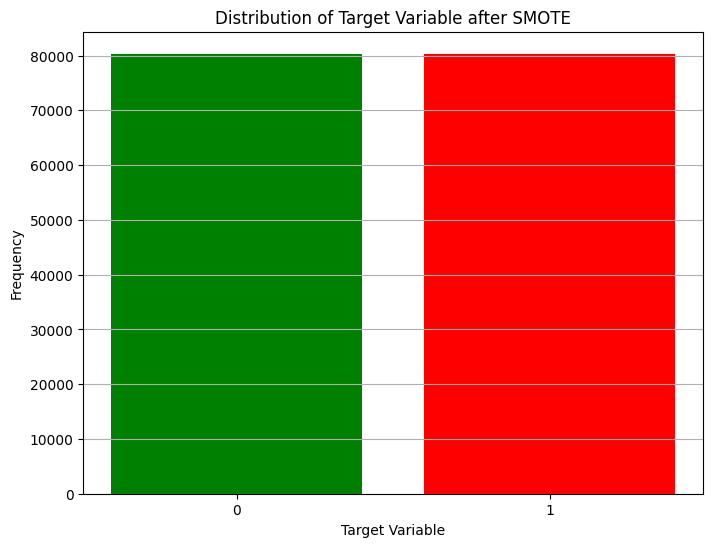

In [13]:
# Define colors for each class
colors = ['green', 'red']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [14]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
df.columns 

Index(['Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AvgTransactionAmount', 'TransactionCount',
       'StdTransactionAmount', 'TransactionHour', 'TransactionDay',
       'TransactionMonth', 'TransactionYear', 'CurrencyCode_UGX',
       'CountryCode_256', 'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',


In [16]:
# Define your feature columns (example given, excluding the target column 'Anemia level')
feature_columns = ['Value', 'PricingStrategy','TotalTransactionAmount', 'AvgTransactionAmount', 'TransactionCount','StdTransactionAmount', 'TransactionHour', 'TransactionDay',
                   'TransactionMonth', 'TransactionYear', 'CurrencyCode_UGX','CountryCode_256',  'ProductCategory_airtime','ProductCategory_data_bundles', 'ProductCategory_financial_services',
                   'ProductCategory_movies',  'ProductCategory_utility_bill', 'FraudResult',
                   'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2','ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']

# Ensure X_train is a DataFrame with the correct number of columns
X_train = pd.DataFrame(X_train, columns=feature_columns)

# Calculate mutual information scores
mi = mutual_info_classif(X_train, y_train)

# Convert mutual information scores to a Pandas Series
mi = pd.Series(mi)

# Label the Series with feature names
mi.index = X_train.columns

# Sort the Series
mi_sorted = mi.sort_values(ascending=False)

# display the sorted Series
mi_sorted

Value                                 0.651243
AvgTransactionAmount                  0.390203
StdTransactionAmount                  0.385685
TotalTransactionAmount                0.381325
TransactionCount                      0.331100
ChannelId_ChannelId_2                 0.197754
ChannelId_ChannelId_3                 0.188133
TransactionDay                        0.028279
PricingStrategy                       0.021639
ProductCategory_utility_bill          0.015890
CountryCode_256                       0.013043
ProductCategory_airtime               0.011479
CurrencyCode_UGX                      0.010048
TransactionMonth                      0.009268
ProductCategory_financial_services    0.007775
TransactionYear                       0.005776
FraudResult                           0.003434
ProductCategory_data_bundles          0.003412
TransactionHour                       0.003331
ChannelId_ChannelId_5                 0.003268
ProductCategory_movies                0.000308
ChannelId_Cha

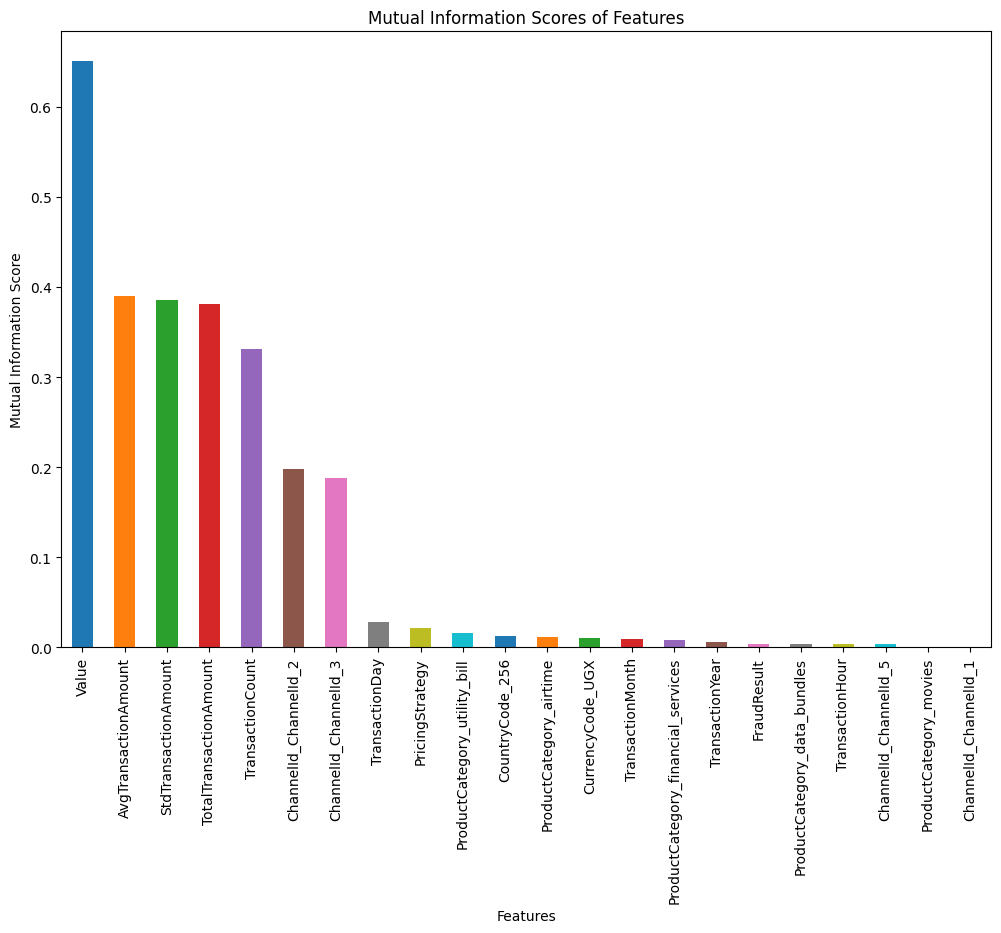

In [17]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Ensure that the validation set has the same columns as the training set
X_val = X_val[X_train.columns]

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Ensure that the test set has the same columns and order as the training set
X_test = X_test[X_train.columns]

# Optionally, evaluate the model on the test set if available
if X_test is not None and y_test is not None:
    y_test_pred = rf_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    print(f'Test Accuracy: {test_accuracy:.4f}')
    print('Test Classification Report:')
    print(test_report)
else:
    print("Test data is not available.")

Validation Accuracy: 1.0000
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12034
           1       1.00      1.00      1.00     12065

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099

Test Accuracy: 1.0000
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11900
           1       1.00      1.00      1.00     12199

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099



In [19]:
# Predict the default probabilities
y_prob = rf_clf.predict_proba(X_test)[:, 1]
y_prob

array([1.   , 1.   , 0.   , ..., 1.   , 0.005, 0.   ])

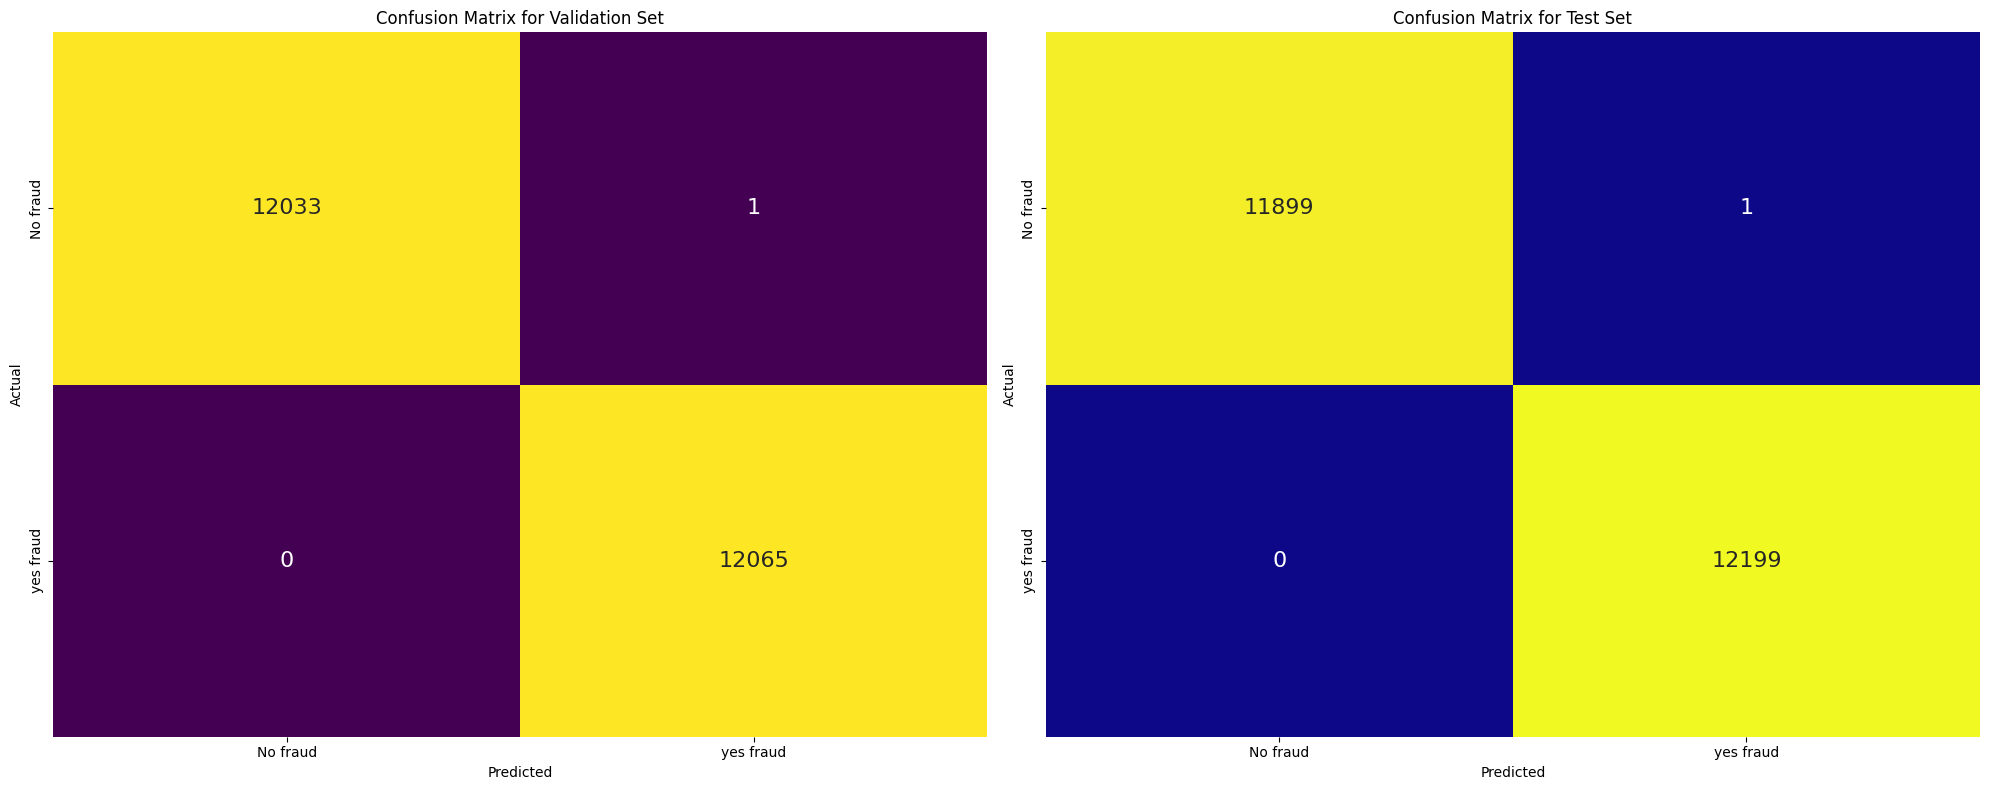

In [20]:
# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Calculate the confusion matrix for the validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Predict on the test set
y_test_pred = rf_clf.predict(X_test)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class names
class_names = ['No fraud', 'yes fraud']

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the confusion matrix for the validation set
sns.heatmap(val_cm, annot=True, fmt='d', cmap="viridis", cbar=False, ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Validation Set')

# Plot the confusion matrix for the test set
sns.heatmap(test_cm, annot=True, fmt='d', cmap="plasma", cbar=False, ax=axes[1],
            xticklabels=class_names, yticklabels=class_names,annot_kws={"size": 16})
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix for Test Set')

# Adjust layout
plt.tight_layout()
plt.show()

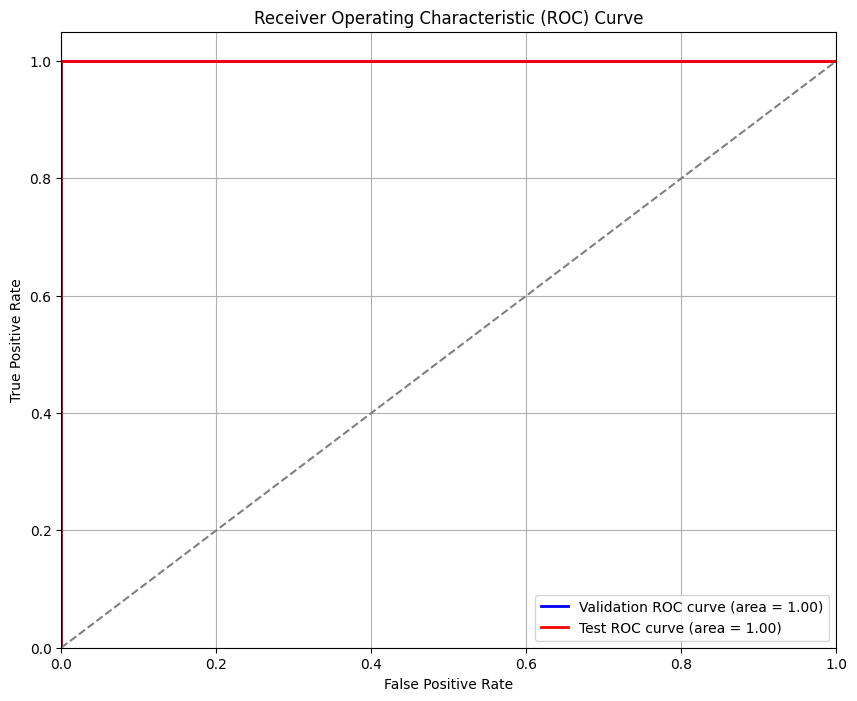

In [21]:
# Predict probabilities on the validation set
y_val_pred_prob = rf_clf.predict_proba(X_val)[:, 1]  # Get the probability of the positive class
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [22]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 1.0000
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12034
           1       1.00      1.00      1.00     12065

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099

Test Accuracy: 0.9999
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11900
           1       1.00      1.00      1.00     12199

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099



Test Accuracy: 0.9999
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11900
           1       1.00      1.00      1.00     12199

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099



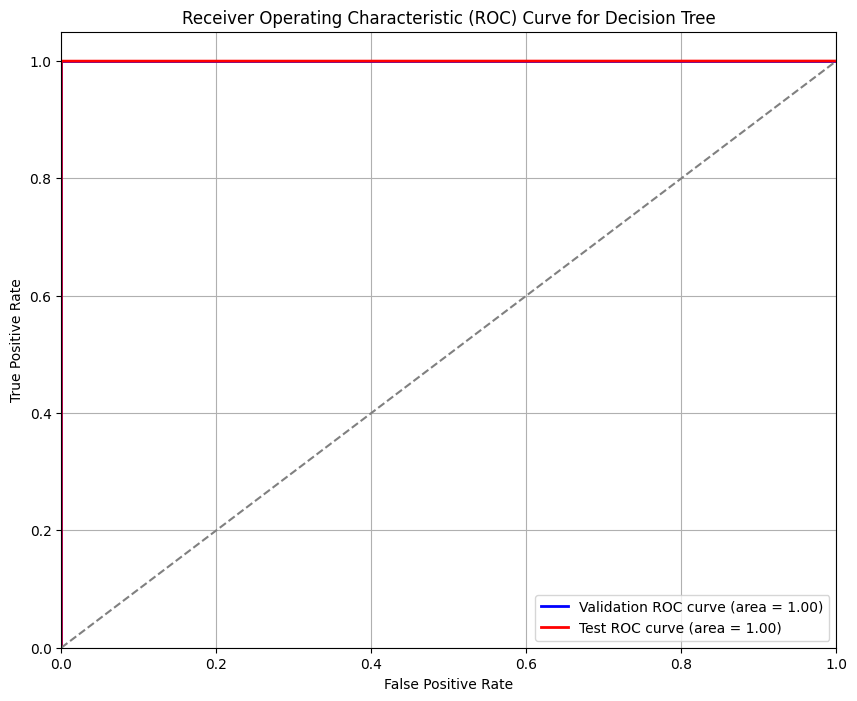

In [23]:


# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

# Predict probabilities on the test set
y_test_pred_prob = dt.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Validation Accuracy: 1.0000
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12034
           1       1.00      1.00      1.00     12065

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099

Test Accuracy: 0.9998
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11900
           1       1.00      1.00      1.00     12199

    accuracy                           1.00     24099
   macro avg       1.00      1.00      1.00     24099
weighted avg       1.00      1.00      1.00     24099



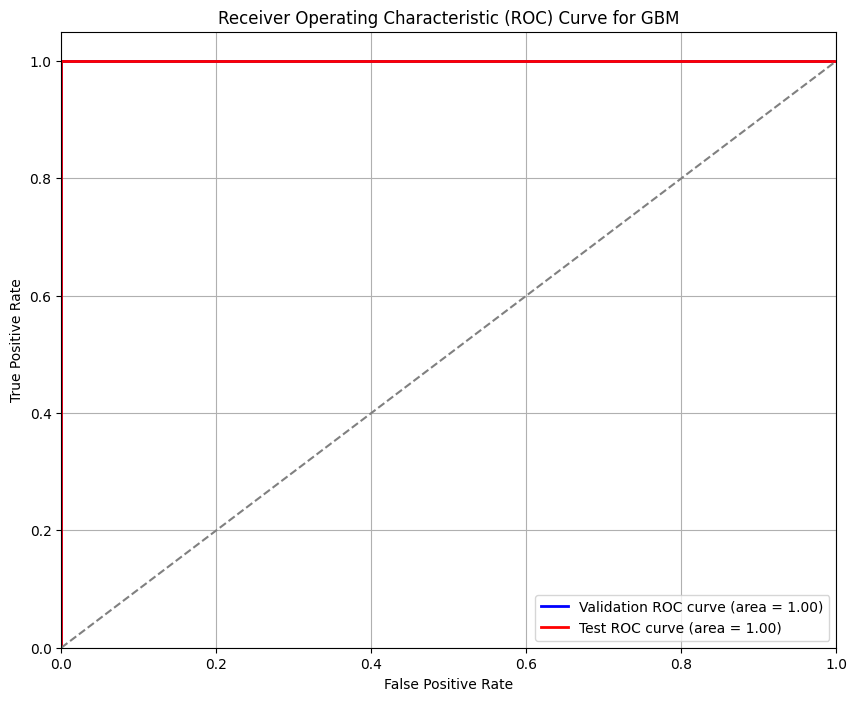

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gbm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = gbm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

# Predict probabilities on the validation set for ROC
y_val_pred_prob = gbm.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = gbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Validation Accuracy: 0.9822
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12034
           1       0.97      0.99      0.98     12065

    accuracy                           0.98     24099
   macro avg       0.98      0.98      0.98     24099
weighted avg       0.98      0.98      0.98     24099

Test Accuracy: 0.9847
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11900
           1       0.98      0.99      0.99     12199

    accuracy                           0.98     24099
   macro avg       0.98      0.98      0.98     24099
weighted avg       0.98      0.98      0.98     24099



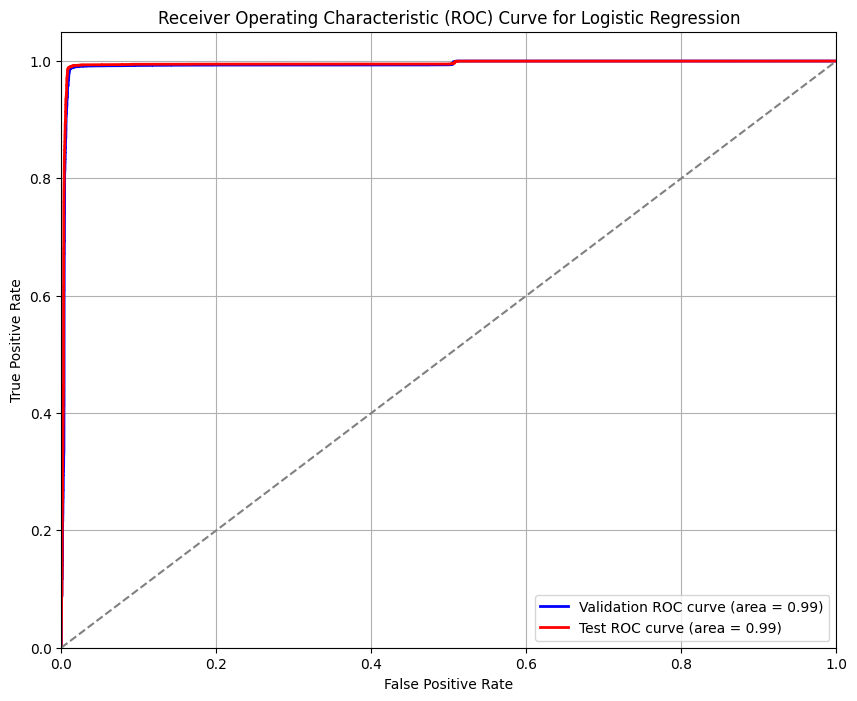

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

# Predict probabilities on the validation set for ROC
y_val_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

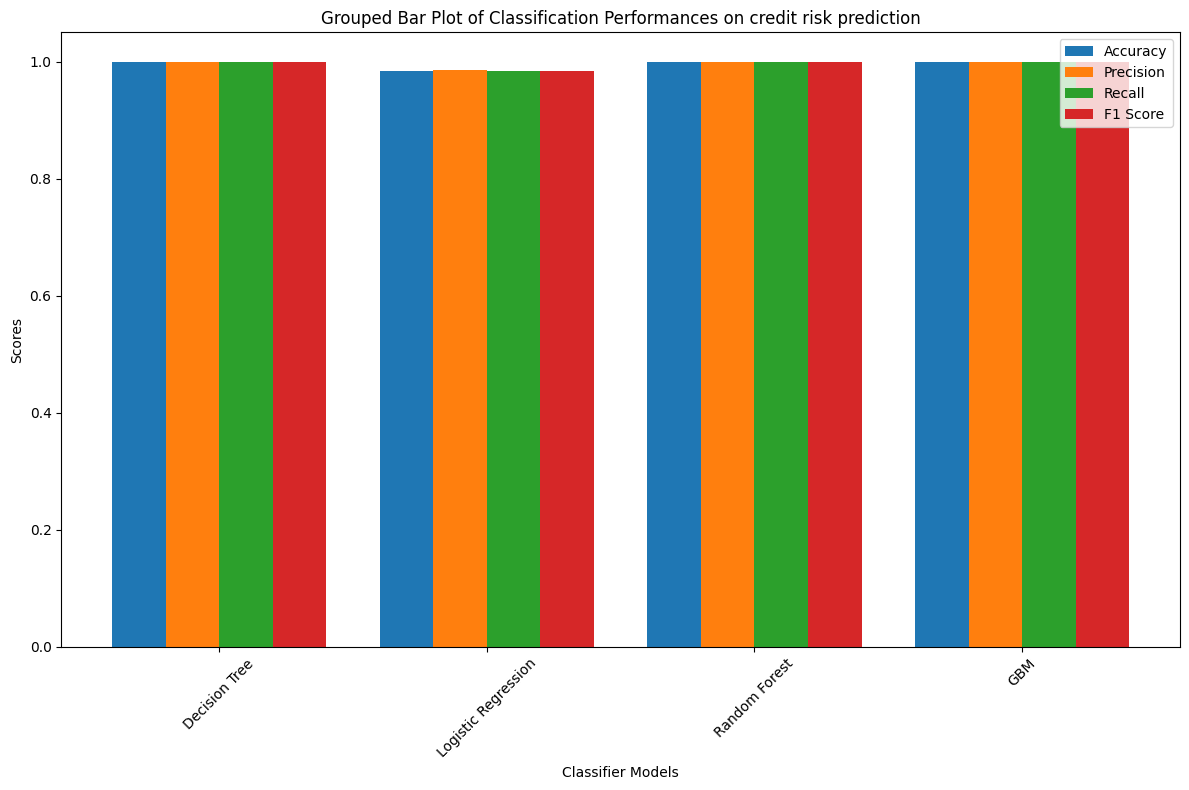

In [26]:
# List of models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    "GBM" : GradientBoostingClassifier(random_state=42)
}

# Initialize a dictionary to store performance metrics
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Iterate over each model to train, predict, and collect metrics
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store metrics
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

# Convert to numpy array for plotting
metrics_array = np.array([performance_metrics['Accuracy'],
                          performance_metrics['Precision'],
                          performance_metrics['Recall'],
                          performance_metrics['F1 Score']])

# Create the grouped bar plot
model_names = list(models.keys())
metric_names = list(performance_metrics.keys())
n_metrics = len(metric_names)
n_models = len(model_names)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.2
indices = np.arange(n_models)

# Plot bars for each metric
for i, metric in enumerate(metric_names):
    ax.bar(indices + i * bar_width, metrics_array[i], bar_width, label=metric)

# Add labels and title
ax.set_xlabel('Classifier Models')
ax.set_ylabel('Scores')
ax.set_title('Grouped Bar Plot of Classification Performances on credit risk prediction')
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()